<a href="https://colab.research.google.com/github/eiman-ops/Illustrations-Classifier/blob/main/Illustrations_Multi_Label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 16.1MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 1.2MB 26.0MB/s 
     |████████████████████████████████| 194kB 54.6MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root_dir = 'gdrive/My Drive/UnpackAi2/Illustrations/'
base_dir = root_dir + 'Illustrations'

Mounted at /content/drive


In [ ]:
path = Path('/content/drive/My Drive/UnpackAi2/Illustrations/')
path.ls()

(#3) [Path('/content/drive/My Drive/UnpackAi2/Illustrations/3D'),Path('/content/drive/My Drive/UnpackAi2/Illustrations/2D'),Path('/content/drive/My Drive/UnpackAi2/Illustrations/LD')]

In [ ]:
files = get_image_files(path)
len(files)

6143

In [ ]:
files[0],files[6000]

(Path('/content/drive/My Drive/UnpackAi2/Illustrations/3D/Low Poly/3D illustration  (3767).jpg'),
 Path('/content/drive/My Drive/UnpackAi2/Illustrations/LD/Line Drawing (198).jpg'))

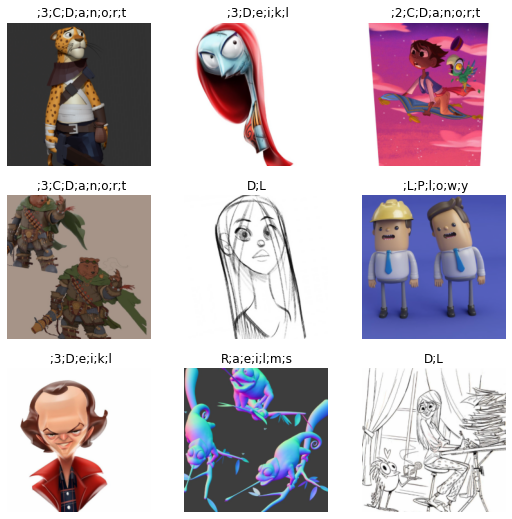

In [ ]:
path = Path('/content/drive/My Drive/UnpackAi2/Illustrations/')
fnames = get_image_files(path)
def label_func(f): return f.parent.name
dblock = DataBlock(blocks=(ImageBlock(), MultiCategoryBlock()),
                  get_items=get_image_files,
                 get_y=parent_label,
                  item_tfms=Resize(460),
                  batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path, bs=64)
dls.show_batch()

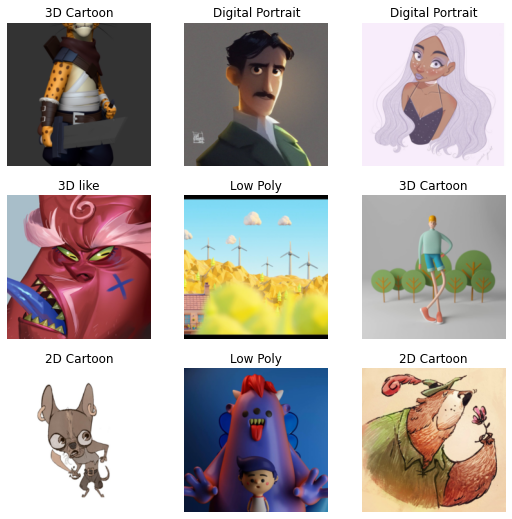

In [ ]:
#path = Path('/content/drive/My Drive/UnpackAi2/Illustrations/')
#fnames = get_image_files(path)
#def label_func(f): return f.parent.name
#dls = ImageDataLoaders.from_path_func(path, fnames,
 # label_func, valid_pct=0.3, seed=42, item_tfms=Resize(224),bs=64 )
#dls.show_batch()


In [ ]:
learn = cnn_learner(dls, resnet34, loss_func=nn.BCEWithLogitsLoss(), metrics=partial(accuracy_multi, thresh=0.5))
learn

In [ ]:
learn.fine_tune(9)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.703060,0.424912,0.819700,09:27


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.424578,0.320254,0.880404,02:59
1,0.290045,0.226357,0.915458,02:55
2,0.197596,0.221930,0.927228,02:56
3,0.133428,0.201377,0.931596,02:57
4,0.088480,0.208251,0.934817,03:03
5,0.058569,0.199793,0.939443,03:06
6,0.037522,0.213701,0.938296,03:09
7,0.026141,0.217244,0.941405,03:08
8,0.021480,0.217618,0.941812,03:10


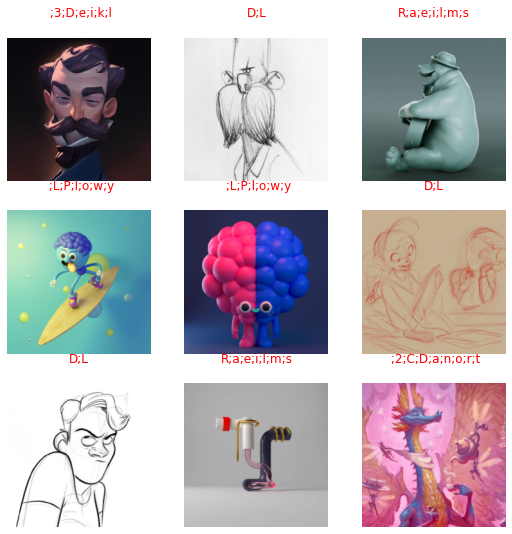

In [ ]:
learn.show_results()

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=9.12010818865383e-07)

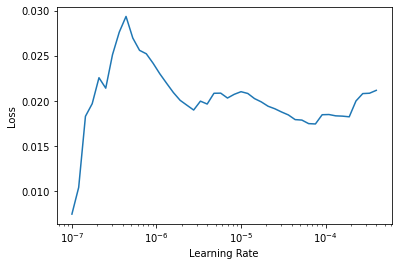

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(7, lr_max=9e-6)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.020828,0.214951,0.941072,03:11
1,0.019370,0.217769,0.941849,03:09
2,0.018084,0.211417,0.941479,02:59
3,0.017377,0.213125,0.939443,02:58
4,0.016751,0.213598,0.943145,02:57
5,0.017666,0.210288,0.940813,02:57
6,0.015502,0.209508,0.942627,02:58


,target,predicted,probabilities,loss
0,R;a;e;i;l;m;s,,"tensor([ 7.3235, -3.4739, 4.6659, 8.5778, 8.6721, -7.7523, -7.4194, -7.9589, 7.7284, -7.9061, -7.1678, -8.0275, -6.5169, -8.7303, -8.0137, 8.6690, 7.7971, 8.7192, -8.2450, 8.6175, -7.4577,\n -7.5895])",5.089636325836182
1,R;a;e;i;l;m;s,,"tensor([ 8.6315, -8.3027, -7.1013, -8.6377, -11.1405, 10.5605, 9.2123, -7.9764, -10.0210, -7.2811, -8.2565, -8.4308, -8.3464, 9.5815, -8.0361, -8.5962, 8.5582, -10.5119, -8.3307,\n -10.1189, 11.6274, 11.5690])",5.0108842849731445
2,;3;C;D;a;n;o;r;t,,"tensor([-8.0255, -6.9861, -5.5372, -6.4694, -8.0756, -7.5397, -6.4327, 7.7787, 6.4829, 7.6739, -7.4587, 7.0237, -6.8438, 6.7817, 8.5183, -6.4569, -7.4863, -7.4275, 8.3134, -7.4220, -6.9555,\n -7.2908])",4.682312965393066
3,;L;P;l;o;w;y,,"tensor([-8.3659, -6.3663, -5.9371, -6.9489, -8.7652, -6.7231, -6.3232, 10.0464, 7.2850, 8.6089, -6.2941, 7.3494, -7.5275, 7.2829, 9.9117, -6.1418, -7.9880, -7.0866, 9.8978, -7.5256, -6.7246,\n -6.8573])",4.368227958679199
4,;3;D;e;i;k;l,,"tensor([ 8.8519, 6.4250, -6.3580, 7.8656, 8.3388, -8.7875, -5.9707, -7.4532, 9.0007, -7.5723, -5.4315, -6.4558, -6.5141, -6.7447, -7.5371, 7.9876, 8.9049, 10.2684, -7.3078, 9.6955, -7.1677,\n -6.9940])",4.264208793640137
5,;2;C;D;a;n;o;r;t,,"tensor([-12.9608, -7.5524, -6.9950, -8.4581, 9.6384, 11.5783, -9.3431, -7.9706, -10.8888, -7.7564, -7.5687, -8.6371, -7.3062, -9.4962, -7.8544, -8.4237, -12.3657, -9.9494, -7.8962,\n -10.2908, -9.0009, -9.6231])",4.203329563140869
6,;3;C;D;a;n;o;r;t,,"tensor([-7.2201, -7.6136, -2.3776, -4.3380, -7.2784, -6.7406, -8.0135, 8.0470, 6.3019, 7.7442, -7.7821, 5.9102, -6.3911, 4.5275, 8.6466, -4.2412, -7.5495, -6.0472, 8.6051, -6.5891, -6.9475,\n -6.9423])",4.057534694671631
7,;3;C;D;a;n;o;r;t,,"tensor([ 5.2529, -5.8464, -5.8994, -7.0042, -8.2070, 9.2193, 7.0163, -6.5916, -7.5920, -6.9913, -6.1628, -7.1125, -6.6315, 5.8483, -6.5559, -6.2661, 5.7285, -7.6737, -6.3606, -7.9509, 8.0611,\n 7.4060])",4.008053302764893
8,R;a;e;i;l;m;s,,"tensor([ 7.5852, -5.2211, -7.5826, -7.2966, -8.0266, 6.6454, 9.0376, -6.7270, -5.6696, -6.6653, -3.8190, -4.4132, -7.1169, 8.8243, -6.8297, -7.4124, 7.7663, -5.7898, -7.3198, -5.4277, 7.9658,\n 7.9665])",3.847811698913574


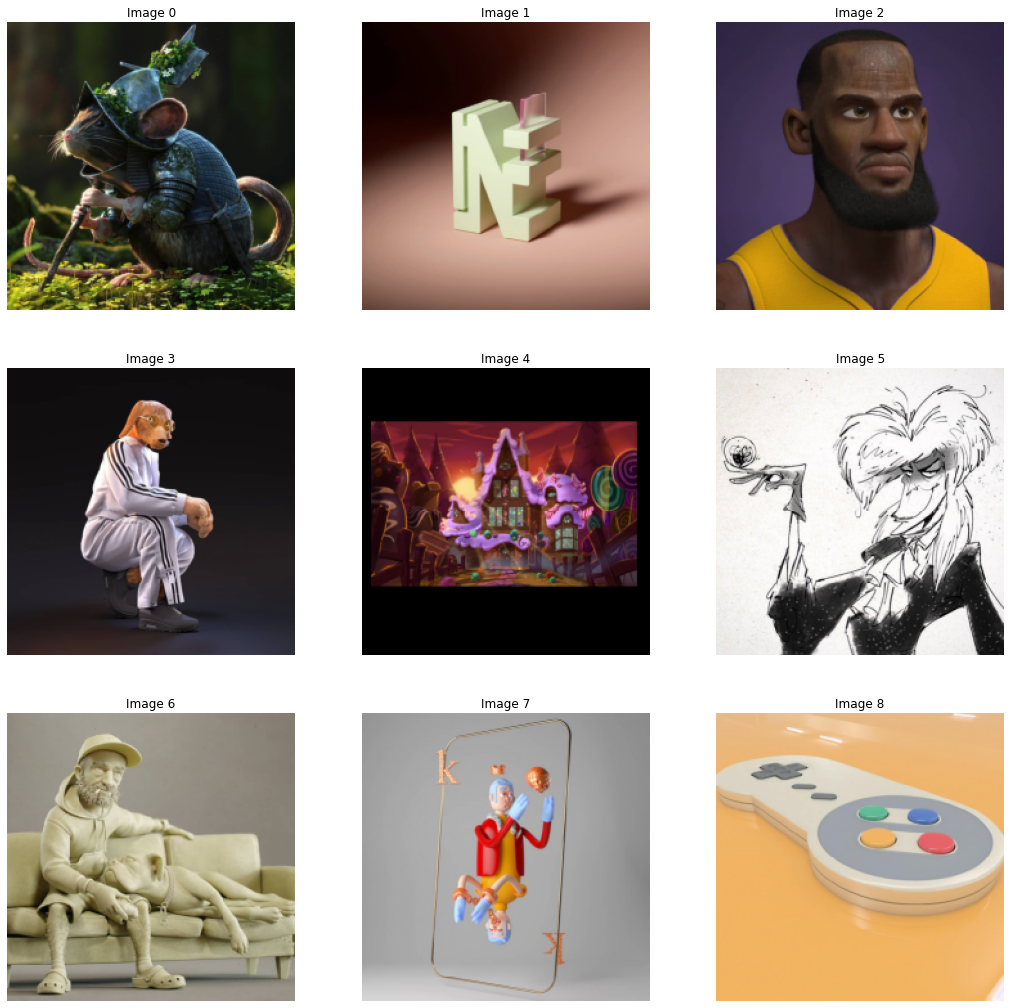

In [ ]:
interp.plot_top_losses(9, figsize=(18,18))

In [ ]:
preds,targs = learn.tta()
accuracy(preds, targs).item()

In [ ]:
learn.export()

In [ ]:
path = Path('/content/drive/My Drive/UnpackAi2/Illustrations/')
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'/content/drive/My Drive/UnpackAi2/Illustrations/export.pkl')

In [ ]:
learn_inf.dls.vocab